In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [44]:
df = pd.read_csv(r"C:\Users\Jayditya\Downloads\DSBDA LAB\Lab\Experiments\Datasets\456housing_data.csv") 
print(df.head())
print(df.shape)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  
(506, 14)


In [56]:
print(" Missing Values:",df.isnull().sum())
df['CRIM'] = df['CRIM'].fillna(df['CRIM'].mean())
df['ZN'] = df['ZN'].fillna(df['ZN'].mean())
df['INDUS'] = df['INDUS'].fillna(df['INDUS'].mean())
df['CHAS'] = df['CHAS'].fillna(df['CHAS'].mean())
df['AGE'] = df['AGE'].fillna(df['AGE'].mean())
df['LSTAT'] = df['LSTAT'].fillna(df['LSTAT'].mean())
print("\nMissing values after imputation:\n", df.isnull().sum())


 Missing Values: CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

Missing values after imputation:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [58]:
print("\n Descriptive statistics:\n", df.describe())


 Descriptive statistics:
              CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.545770   22.921051    6.699165    0.250233    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.083235    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.290250    0.000000    9.900000    0.000000    0.538000    6.208500   
75%      3.611874   11.211934   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534  356.674032   


In [62]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]
# Removing outliers 
for col in df.select_dtypes(include=[np.number]).columns:
    if col != 'CHAS' and col != 'MEDV':
        df = remove_outliers(df, col)
print(df.shape)

(110, 14)


In [64]:
scaler = StandardScaler()
df_scaled = df.copy()
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print("Sample Scaled Data (StandardScaler):")
print(df_scaled.head())

Sample Scaled Data (StandardScaler):
        CRIM        ZN     INDUS  CHAS       NOX        RM       AGE  \
5  -1.125733 -0.446633 -1.935118   0.0 -0.700778  0.863253  0.113168   
35 -0.790977 -0.446633 -0.710527   0.0  0.130694 -0.684042  0.520390   
37 -0.635206 -0.446633 -0.710527   0.0  0.130694 -0.942443 -0.624118   
38  0.290543 -0.446633 -0.710527   0.0  0.130694 -0.581304 -1.108498   
41 -0.173843 -0.446633 -0.402760   0.0 -0.903576  1.921764 -2.278726   

         DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
5   1.220853 -1.588773 -1.268203  0.033488  0.098740 -1.509728  1.964480  
35 -0.630774  0.582221 -0.409031  0.425371  0.826852  0.655628 -1.028749  
37 -0.237477  0.582221 -0.409031  0.425371  0.826852 -0.482650 -0.387343  
38 -0.297030  0.582221 -0.409031  0.425371 -0.081978 -0.090283  0.742754  
41  0.986958 -1.588773 -1.102398 -0.593524 -2.182502 -1.616475  1.323074  


In [66]:
normalizer = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numeric_cols] = normalizer.fit_transform(df[numeric_cols])
print("Sample Normalized Data (MinMaxScaler):")
print(df_normalized.head())

Sample Normalized Data (MinMaxScaler):
        CRIM   ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
5   0.021839  0.0  0.058565   0.0  0.227907  0.560912  0.592357  0.555832   
35  0.094325  0.0  0.335286   0.0  0.418605  0.237134  0.693206  0.176138   
37  0.128055  0.0  0.335286   0.0  0.418605  0.183062  0.409766  0.256788   
38  0.328511  0.0  0.335286   0.0  0.418605  0.258632  0.289809  0.244576   
41  0.227955  0.0  0.404832   0.0  0.181395  0.782410  0.000000  0.507870   

         RAD       TAX   PTRATIO         B     LSTAT      MEDV  
5   0.000000  0.118852  0.519231  0.807746  0.046985  0.744048  
35  0.666667  0.352459  0.615385  1.000000  0.573312  0.160714  
37  0.666667  0.352459  0.615385  1.000000  0.296634  0.285714  
38  0.666667  0.352459  0.615385  0.760028  0.392006  0.505952  
41  0.000000  0.163934  0.365385  0.205394  0.021038  0.619048  


In [70]:
X = df.drop('MEDV', axis=1)  # medv=Median Home Price
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
model = LinearRegression()
# Training
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [74]:
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error (MSE): {mse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2:.2f}")


Mean Squared Error (MSE): 3.77
R-squared (R²): 0.75


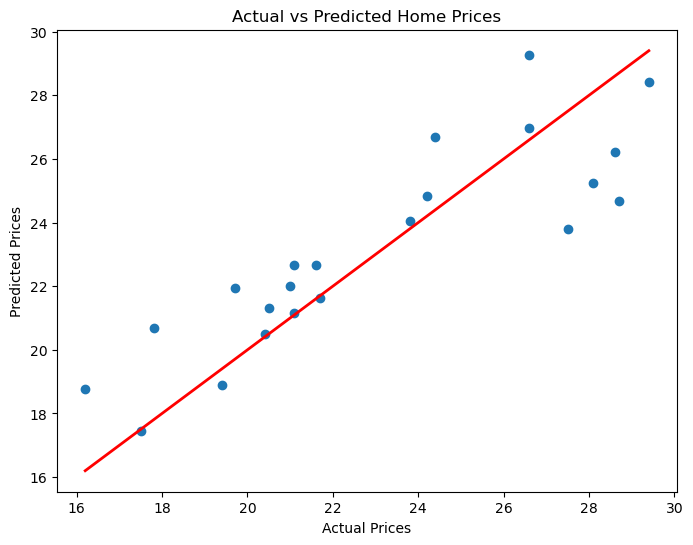

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title("Actual vs Predicted Home Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()